<center>
    <img alt="Olympic Logo" src="https://img.olympics.com/images/image/private/t_s_pog_staticContent_hero_md_2x/f_auto/primary/d1fpfljg04lwl1qje9rh" width=400>
</center>

# Explanatory Data Analysis and Seaborn Visualization (Olympic Games)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

THEME


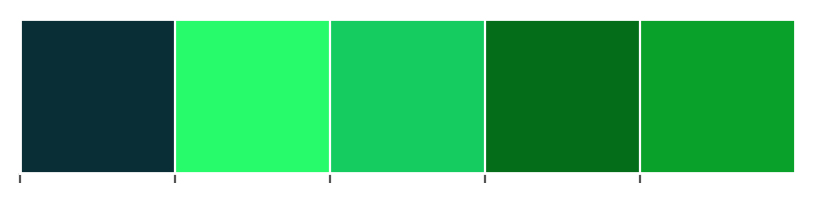

In [2]:
#Lets set the style of all our seaborn based plots
plt.style.use(['ggplot'])
# Setting the theme of our plots
theme = ["#0a2e36", "#27FB6B","#14cc60","#036d19","#09a129"]
print('THEME')
sns.palplot(sns.color_palette(theme))
palette = sns.set_palette(sns.color_palette(theme))

## 1. Data import.

In [3]:
dictionary_df = pd.read_csv("/Users/mac/Desktop/Project I5/PDS-Project/datasets/3-dictionary.csv")
summer_df=  pd.read_csv("/Users/mac/Desktop/Project I5/PDS-Project/datasets/3-summer.csv")
winter_df = pd.read_csv("/Users/mac/Desktop/Project I5/PDS-Project/datasets/3-winter.csv")

### 1.1. `Dictionary` data

In [4]:
print(f"Shape of dictionary dataframe: {dictionary_df.shape}")
dictionary_df.sample(10)

Shape of dictionary dataframe: (201, 4)


,Country,Code,Population,GDP per Capita
165,Slovenia,SLO,2063768.0,20726.539886
123,Morocco,MAR,34377511.0,2878.201342
75,Guatemala,GUA,16342897.0,3903.478856
21,Benin,BEN,10879829.0,762.051205
115,Malta,MLT,431333.0,22596.181774
112,Malaysia,MAS,30331007.0,9768.326860
187,Uganda,UGA,39032383.0,705.292570
134,Nigeria,NGR,182201962.0,2640.290739
104,Liberia,LBR,4503438.0,455.873935
186,Turkmenistan,TKM,5373502.0,6672.477544


### 1.2. `Summer Olympics` data

In [5]:
print(f"Shape of summer dataframe: {summer_df.shape}")
summer_df.sample(10)

Shape of summer dataframe: (31165, 9)


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
20204,1992,Barcelona,Boxing,Boxing,"HONG, Sung Sik",KOR,Men,57 - 60KG (Lightweight),Bronze
8655,1952,Helsinki,Hockey,Hockey,"NUNN, Anthony Stuart",GBR,Men,Hockey,Bronze
22127,1996,Atlanta,Equestrian,Eventing,"NICHOLSON, Andrew",NZL,Men,Team,Bronze
23664,2000,Sydney,Athletics,Athletics,"BACKLEY, Steve",GBR,Men,Javelin Throw,Silver
28472,2008,Beijing,Handball,Handball,"RIEGELHUTH, Linn-Kristin",NOR,Women,Handball,Gold
6918,1936,Berlin,Handball,Handball,"KLINGLER, Alfred",GER,Men,Handball,Gold
20499,1992,Barcelona,Football,Football,"GUARDIOLA SALA, Josep",ESP,Men,Football,Gold
14159,1976,Montreal,Athletics,Athletics,"JUANTORENA, Alberto",CUB,Men,800M,Gold
11357,1964,Tokyo,Hockey,Hockey,"LAXMAN, Shankar",IND,Men,Hockey,Gold
6395,1936,Berlin,Aquatics,Water polo,"DE COMBE, Joseph",BEL,Men,Water Polo,Bronze


### 1.3. `Winter Olympics` data

In [6]:
print(f"Shape of winter dataframe: {winter_df.shape}")
winter_df.sample(10)

Shape of winter dataframe: (5770, 9)


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
4066,2002,Salt Lake City,Skiing,Nordic Combined,"HOEHLIG, Marcel",GER,Men,Team,Silver
1877,1980,Lake Placid,Ice Hockey,Ice Hockey,"KASATONOV, Aleksei",URS,Men,Ice Hockey,Silver
4467,2006,Turin,Skating,Speed skating,"VOELKER, Sabine",GER,Women,Team Pursuit,Gold
4277,2006,Turin,Ice Hockey,Ice Hockey,"SELANNE, Teemu",FIN,Men,Ice Hockey,Silver
4251,2006,Turin,Ice Hockey,Ice Hockey,"SUNDIN, Ronnie",SWE,Men,Ice Hockey,Gold
2033,1984,Sarajevo,Biathlon,Biathlon,"STORSVEEN, Rolf",NOR,Men,4X7.5KM Relay,Silver
4220,2006,Turin,Ice Hockey,Ice Hockey,"LANG, Robert",CZE,Men,Ice Hockey,Bronze
3242,1998,Nagano,Curling,Curling,"SAVAGE, Paul",CAN,Men,Curling,Silver
1368,1968,Grenoble,Skiing,Cross Country Skiing,"TYLDUM, Paal",NOR,Men,4X10KM Relay,Gold
3690,2002,Salt Lake City,Curling,Curling,"GRICHTING, Damian",SUI,Men,Curling,Bronze


## 2. Merging and Concatenating summer & winter.

In [7]:
dictionary_df_copy = dictionary_df.copy()
summer_df_copy = summer_df.copy()
winter_df_copy = winter_df.copy()

In [8]:
summer_winter_df = pd.merge(summer_df_copy, winter_df_copy, how='outer')

print(f"Shape of merged dataframe: {summer_winter_df.shape}")
summer_winter_df.sample(10)

Shape of merged dataframe: (36935, 9)


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
33274,1984,Sarajevo,Ice Hockey,Ice Hockey,"SINDEL, Jaromir",TCH,Men,Ice Hockey,Silver
7654,1948,London,Fencing,Fencing,"PAPP, Bertalan",HUN,Men,Sabre Team,Gold
35849,2010,Vancouver,Bobsleigh,Bobsleigh,"TOMASEVICZ, Curtis",USA,Men,Four-Man,Gold
5712,1928,Amsterdam,Wrestling,Wrestling Gre-R,"MOUSTAPHA, Ibrahim",EGY,Men,75 - 82.5KG (Light-Heavyweight),Gold
12891,1972,Munich,Aquatics,Water polo,"SZIVOS, Istvan",HUN,Men,Water Polo,Silver
20874,1992,Barcelona,Rowing,Rowing,"KÖPPEN, Kerstin",GER,Women,Double Sculls (2X),Gold
32195,1964,Innsbruck,Ice Hockey,Ice Hockey,"GREGOR, Frantisek",TCH,Men,Ice Hockey,Bronze
34748,1998,Nagano,Skiing,Nordic Combined,"LAJUNEN, Samppa",FIN,Men,Team,Silver
11015,1964,Tokyo,Boxing,Boxing,"PURHONEN, Pertti Ilmari",FIN,Men,63.5 - 67KG (Welterweight),Bronze
2253,1912,Stockholm,Football,Football,"BREBNER, Ronald Gilchrist",GBR,Men,Football,Gold


## 3. Data Cleaning.

In [9]:
summer_winter_df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [10]:
summer_winter_df.query("Country.isnull()")

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


### 3.1. Dealing with Missing Athletes Information

* [KUDUKHOV, Besik](https://www.google.com/search?q=KUDUKHOV%2C+Besik&oq=KUDUKHOV%2C+Besik&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIICAEQABgWGB4yCAgCEAAYFhgeMggIAxAAGBYYHjIICAQQABgWGB4yCAgFEAAYFhgeMggIBhAAGBYYHtIBCDEzODJqMGo5qAIAsAIB&sourceid=chrome&ie=UTF-8) is a Russian professional wrestler.

In [11]:
# Replace Country to RUS if the Athlete is "KUDUKHOV, Besik"
summer_winter_df.loc[summer_winter_df["Athlete"] == "KUDUKHOV, Besik", "Country"] = "RUS"
summer_winter_df[summer_winter_df['Athlete'] == "KUDUKHOV, Besik"]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29149,2008,Beijing,Wrestling,Wrestling Free.,"KUDUKHOV, Besik",RUS,Men,- 55KG,Bronze
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",RUS,Men,Wf 60 KG,Silver


In [12]:
summer_winter_df.query("Country.isnull()")

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver


In London Olympics 2012, 
* The Women Gold Medalist of 1500M Athletics is "[MARYAM, Yusuf Jamal](https://olympics.com/en/olympic-games/london-2012/results/athletics/1500m-women)" from `Bahrain/BRN`
* The Women Gold Medalist of 63Kg Weightlifting is [CHRISTINE, Girard](https://olympics.com/en/olympic-games/london-2012/results/weightlifting/63kg-women) from `CANADA/CAN`
* The Men Silver Medalist of 94Kg Weightlifting is [KIM, Min-Jae](https://olympics.com/en/olympic-games/london-2012/results/weightlifting/94kg-men) from `KOREA/KOR`

In [13]:
summer_winter_df.loc[29603, "Athlete"] = "MARYAM, Yusuf Jamal"
summer_winter_df.loc[31072, "Athlete"] = "CHRISTINE, Girard"
summer_winter_df.loc[31091, "Athlete"] = "KIM, Min-Jae"

summer_winter_df.loc[29603, "Country"] = "BRN"
summer_winter_df.loc[31072, "Country"] = "CAN"
summer_winter_df.loc[31091, "Country"] = "KOR"

In [14]:
display(summer_winter_df[summer_winter_df['Athlete'] == "MARYAM, Yusuf Jamal"])
display(summer_winter_df[summer_winter_df['Athlete'] == "CHRISTINE, Girard"])
display(summer_winter_df[summer_winter_df['Athlete'] == "KIM, Min-Jae"])

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,"MARYAM, Yusuf Jamal",BRN,Women,1500M,Gold


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31072,2012,London,Weightlifting,Weightlifting,"CHRISTINE, Girard",CAN,Women,63KG,Gold


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31091,2012,London,Weightlifting,Weightlifting,"KIM, Min-Jae",KOR,Men,94KG,Silver


In [15]:
summer_winter_df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

### 3.2. Checking Duplicated Value

In [16]:
# Check for duplicated values
summer_winter_df.duplicated().sum()

2

In [17]:
# Display duplicated values
display(summer_winter_df[summer_winter_df.duplicated()])

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
16099,1980,Moscow,Hockey,Hockey,"SINGH, Singh",IND,Men,Hockey,Gold
29780,2012,London,Badminton,Badminton,"ZHAO, Yunlei",CHN,Women,Doubles,Gold


In [18]:
# Checking dataframe shape before dropped duplicated values
print(f"Before dropped duplicated values: {summer_winter_df.shape}")

Before dropped duplicated values: (36935, 9)


In [19]:
# Drop duplicated values
summer_winter_df.drop_duplicates(inplace=True)

In [20]:
# Checking dataframe shape after dropped duplicated values
print(f"After dropped duplicated values: {summer_winter_df.shape}")

After dropped duplicated values: (36933, 9)


### 3.3. Checking unique values of specific column of dataframe

In [21]:
# Check unique values
print(summer_winter_df['Country'].unique())
print(f"\nNumber of unique countries: {summer_winter_df['Country'].nunique()}")

['HUN' 'AUT' 'GRE' 'USA' 'GER' 'GBR' 'FRA' 'AUS' 'DEN' 'SUI' 'ZZX' 'NED'
 'BEL' 'IND' 'CAN' 'BOH' 'SWE' 'NOR' 'ESP' 'ITA' 'CUB' 'ANZ' 'RSA' 'FIN'
 'RU1' 'EST' 'TCH' 'NZL' 'BRA' 'JPN' 'LUX' 'ARG' 'POL' 'POR' 'URU' 'YUG'
 'ROU' 'HAI' 'EGY' 'PHI' 'IRL' 'CHI' 'LAT' 'MEX' 'TUR' 'PAN' 'JAM' 'SRI'
 'KOR' 'PUR' 'PER' 'IRI' 'TRI' 'URS' 'VEN' 'BUL' 'LIB' 'EUA' 'ISL' 'PAK'
 'BAH' 'BWI' 'TPE' 'ETH' 'MAR' 'GHA' 'IRQ' 'SIN' 'TUN' 'KEN' 'NGR' 'GDR'
 'FRG' 'UGA' 'CMR' 'MGL' 'PRK' 'COL' 'NIG' 'THA' 'BER' 'TAN' 'GUY' 'ZIM'
 'CHN' 'CIV' 'ZAM' 'DOM' 'ALG' 'SYR' 'SUR' 'CRC' 'INA' 'SEN' 'DJI' 'AHO'
 'ISV' 'EUN' 'NAM' 'QAT' 'LTU' 'MAS' 'CRO' 'ISR' 'SLO' 'IOP' 'RUS' 'UKR'
 'ECU' 'BDI' 'MOZ' 'CZE' 'BLR' 'TGA' 'KAZ' 'UZB' 'SVK' 'MDA' 'GEO' 'HKG'
 'ARM' 'AZE' 'BAR' 'KSA' 'KGZ' 'KUW' 'VIE' 'MKD' 'SCG' 'ERI' 'PAR' 'UAE'
 'SRB' 'SUD' 'MRI' 'TOG' 'TJK' 'AFG' 'BRN' 'GUA' 'GRN' 'TTO' 'BOT' 'MNE'
 'CYP' 'SGP' 'GAB' 'LIE']

Number of unique countries: 148


## 4. What Are The Most Successful Countries of All Times?

### [Optional]: Design Bar Plot Function

In [22]:
def barplot(data, x, y, palette, hue):
    """
    Function to create a barplot
    
    Parameters
    ----------
    data: DataFrame
        The dataframe to plot
    x: str
        The column to use as the x-axis
    y: str
        The column to use as the y-axis
    palette: str
        The color palette to use
    hue: str
        The column to use as the hue
    
    Returns
    -------
    ax : matplotlib.axes._subplots.AxesSubplot
        The axes with the barplot
    """
    # Plot bar graph
    ax = sns.barplot(
        data=data,
        x=x,
        y=y,
        palette=palette,
        hue=hue
    )

    # Add labels on each bar
    for i in ax.containers:
        ax.bar_label(i, fontsize=7)

    return ax

### 4.1. Most Successful Countries of All Times

In [23]:
# Group by Country and Medal, count each type of medal separately
medal_counts = (
    summer_winter_df.groupby(["Country", "Medal"])
    .size()
    .unstack(fill_value=0)  # use to create seperate columns for each medal types
    .reset_index()
)

medal_counts["Total_Medals"] = medal_counts.sum(axis=1, numeric_only=True)
most_successful_countries = medal_counts.sort_values("Total_Medals", ascending=False)
most_successful_countries.head(10)

Medal,Country,Bronze,Gold,Silver,Total_Medals
140,USA,1265,2402,1571,5238
138,URS,677,1088,724,2489
47,GBR,587,580,632,1799
50,GER,572,589,504,1665
44,FRA,578,444,526,1548
68,ITA,481,534,473,1488
122,SWE,505,476,496,1477
21,CAN,369,471,435,1275
6,AUS,479,317,408,1204
58,HUN,359,412,320,1091


In [24]:
top_10_successful_countries = most_successful_countries.iloc[:10]
display(top_10_successful_countries)

Medal,Country,Bronze,Gold,Silver,Total_Medals
140,USA,1265,2402,1571,5238
138,URS,677,1088,724,2489
47,GBR,587,580,632,1799
50,GER,572,589,504,1665
44,FRA,578,444,526,1548
68,ITA,481,534,473,1488
122,SWE,505,476,496,1477
21,CAN,369,471,435,1275
6,AUS,479,317,408,1204
58,HUN,359,412,320,1091


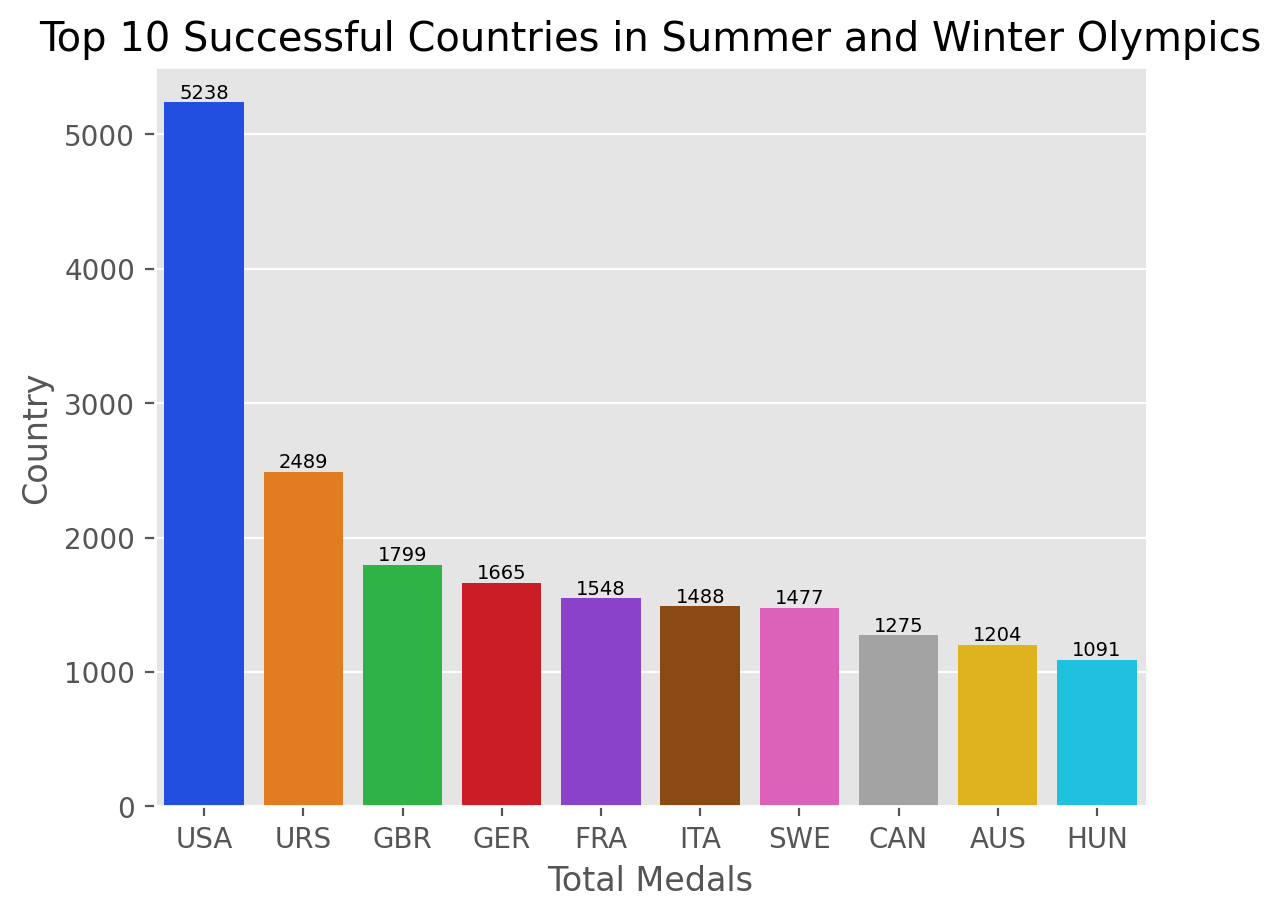

In [25]:
# Barplot of top 10 successful countries
ax = barplot(
    data=top_10_successful_countries, 
    x="Country", 
    y="Total_Medals",
    palette="bright",
    hue="Country"
);

ax.set_title("Top 10 Successful Countries in Summer and Winter Olympics");
ax.set_xlabel("Total Medals");
ax.set_ylabel("Country");

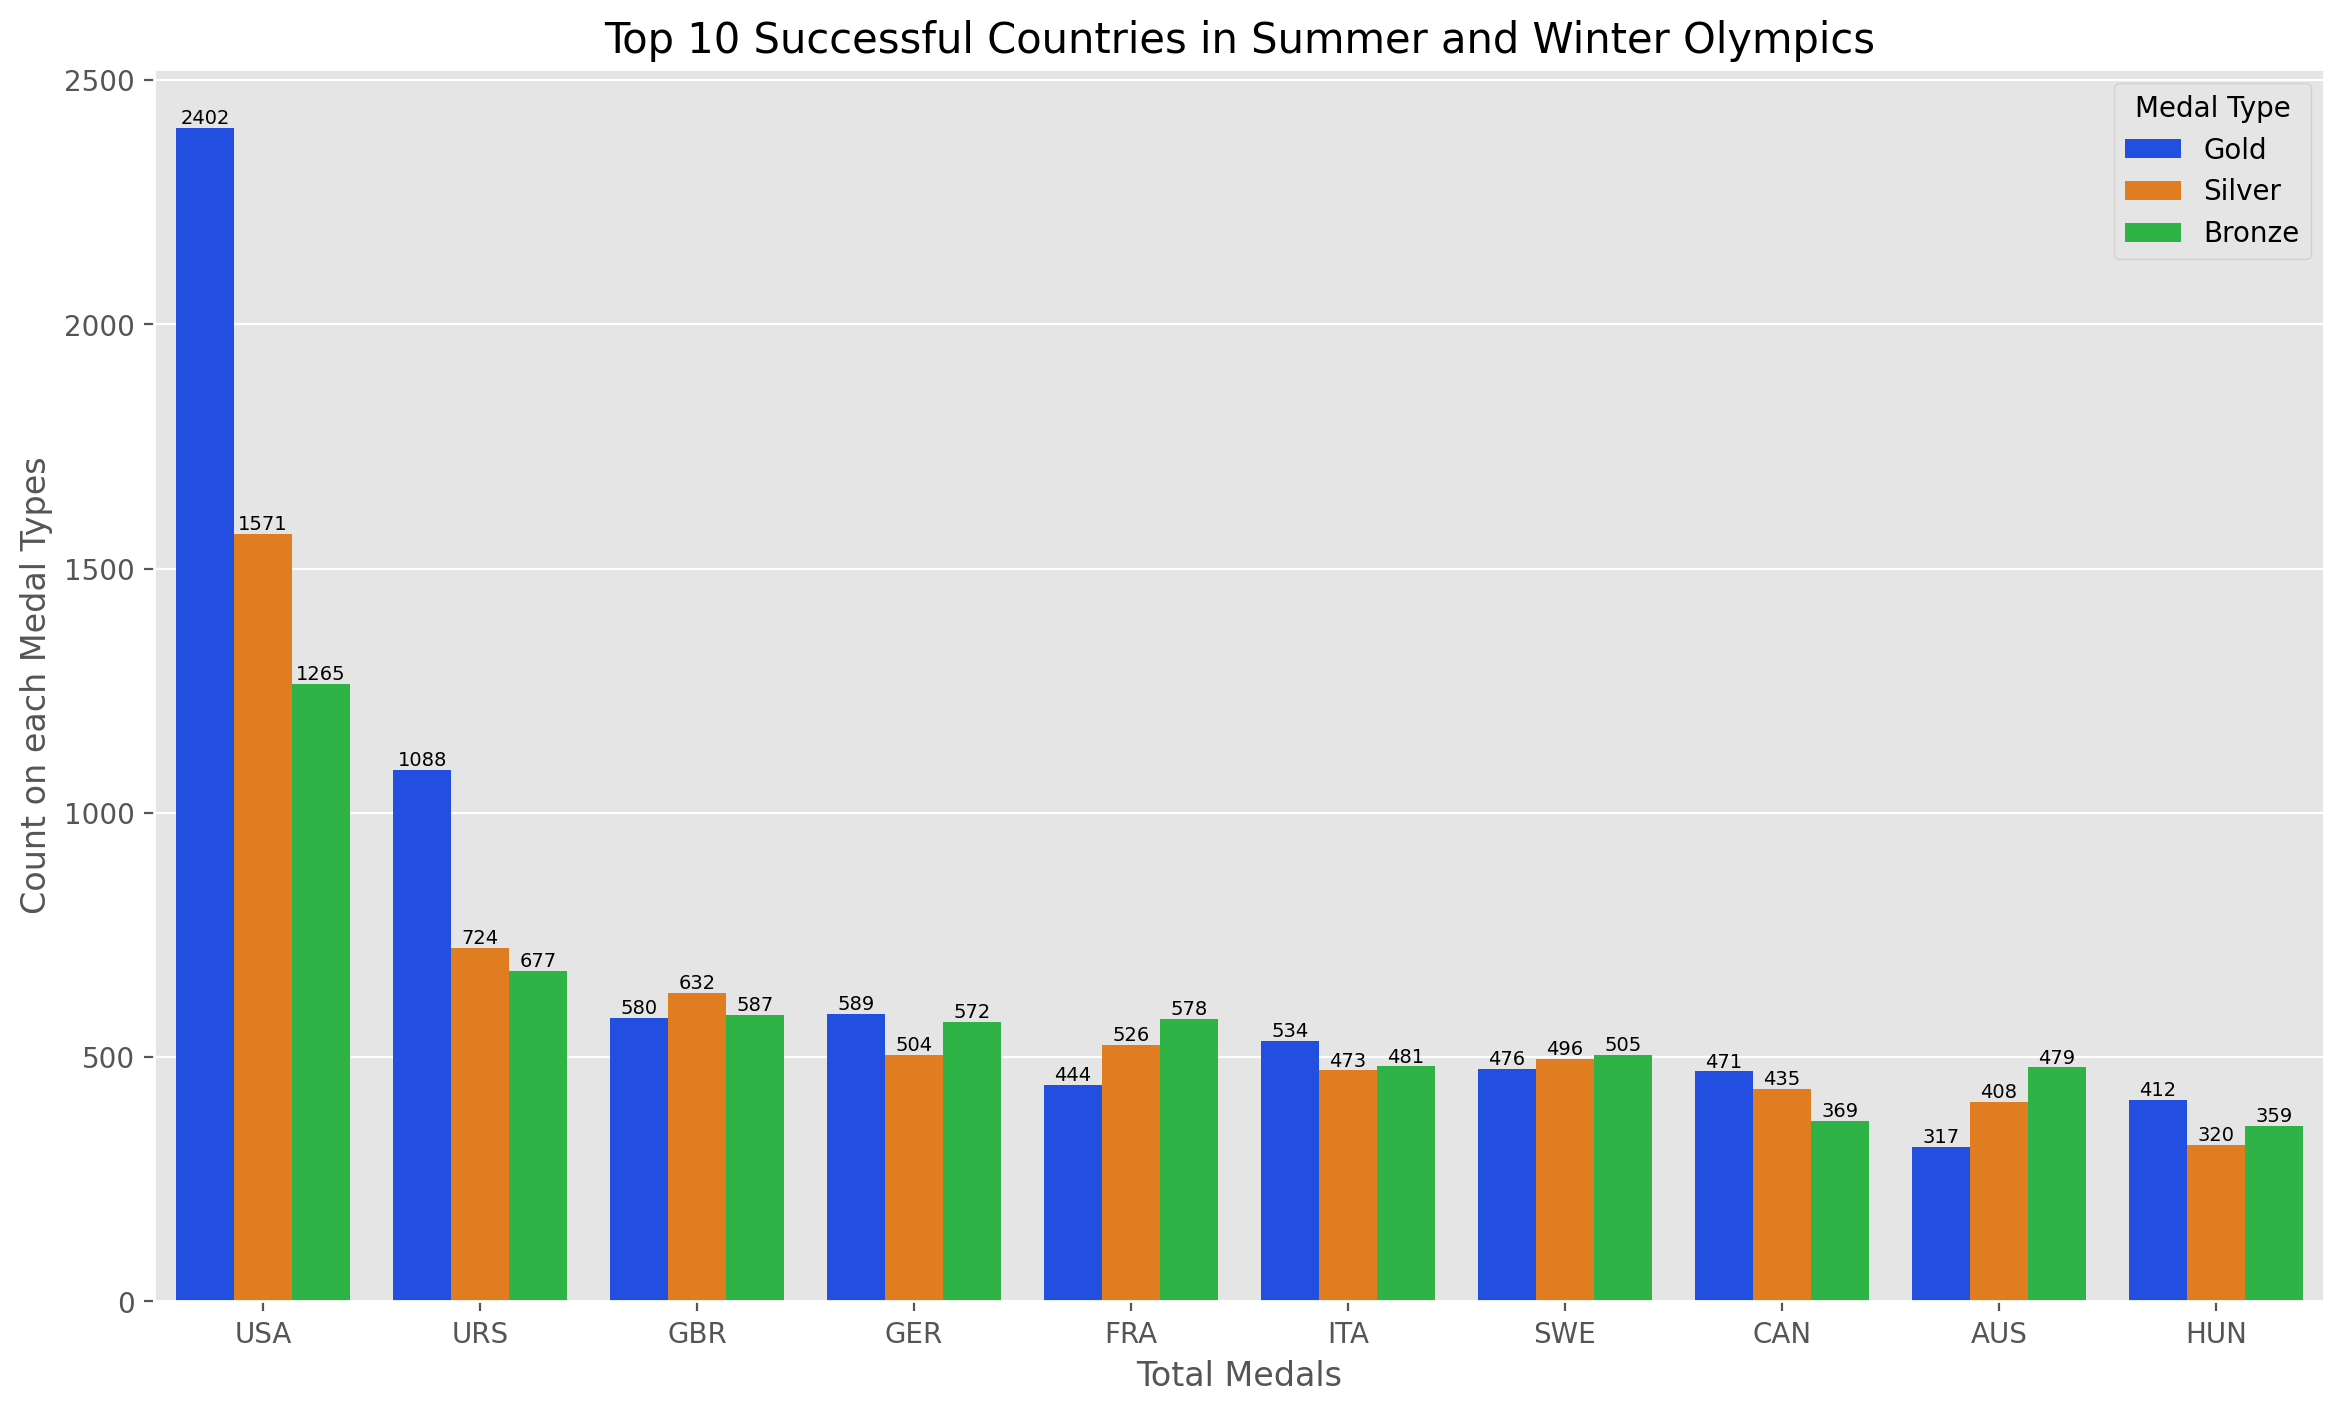

In [26]:
melted_top_10_successful_countries = top_10_successful_countries.melt(
    id_vars="Country", 
    value_vars=["Gold", "Silver", "Bronze"], 
    var_name="Medal Type", 
    value_name="Count"
)

plt.figure(figsize=(14,8))
ax = sns.barplot(
    data=melted_top_10_successful_countries, 
    x="Country", 
    y="Count", 
    hue="Medal Type", 
    palette="bright",
    
)
for i in ax.containers:
    ax.bar_label(i, fontsize=7)

ax.set_title("Top 10 Successful Countries in Summer and Winter Olympics", fontdict={"fontsize": 15});
ax.set_xlabel("Total Medals");
ax.set_ylabel("Count on each Medal Types");

<center>
    <img alt="USA" src="https://cdn.britannica.com/79/4479-050-6EF87027/flag-Stars-and-Stripes-May-1-1795.jpg" width=234>
    <img alt="URS" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_the_Soviet_Union.png/1024px-Flag_of_the_Soviet_Union.png" width=280>
    <img alt="GBR" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Flag_of_the_United_Kingdom_%281-2%29.svg/1200px-Flag_of_the_United_Kingdom_%281-2%29.svg.png" width=280>
    <img alt="GER" src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Flag_of_Germany.svg" width=235>
</center>
<center>
    <img alt="FRA" src="https://cdn.britannica.com/82/682-004-F0B47FCB/Flag-France.jpg" width=220>
    <img alt="ITA" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Flag_of_Italy.svg/1500px-Flag_of_Italy.svg.png" width=220>
    <img alt="SWE" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Flag_of_Sweden.svg/1200px-Flag_of_Sweden.svg.png" width=230>
    <img alt="CAN" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Flag_of_Canada_%28Pantone%29.svg/1200px-Flag_of_Canada_%28Pantone%29.svg.png" width=293>
</center>
<center>
    <img alt="AUS" src="https://upload.wikimedia.org/wikipedia/commons/8/88/Flag_of_Australia_%28converted%29.svg" width=260>
    <img alt="HUN" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Flag_of_Hungary.svg/1200px-Flag_of_Hungary.svg.png" width=260>
</center>

According to the data and graph:
* `USA` leads with a significant number of Gold medals (2402) and Total Medals (5238), far surpassing other countries.
* `URS (former Soviet Union)` follows with a strong performance, particularly in Gold (1088) and Total Medals (2489).
* Countries like `Great Britain (GBR)` and `Germany (GER)` show balanced distributions of Gold, Silver, and Bronze medals, while `Italy (ITA)` and `Canada (CAN)` have fewer total medals but still rank high in specific categories.

### 4.2. Most Successful Athletes of All Times

In [27]:
each_athlete_medal_count = (
    summer_winter_df.groupby(["Athlete", "Country", "Gender", "Medal"])
    .size()
    .unstack(fill_value=0)
)

each_athlete_medal_count["Total_Medals"] = each_athlete_medal_count.sum(axis=1, numeric_only=True)
most_successful_athletes = each_athlete_medal_count.sort_values("Total_Medals", ascending=False)

In [28]:
# Filter for male athletes and take the top 5
top_5_men = most_successful_athletes[
    most_successful_athletes.index.get_level_values("Gender") == "Men"
].head(5)

# Filter for female athletes and take the top 5
top_5_women = most_successful_athletes[
    most_successful_athletes.index.get_level_values("Gender") == "Women"
].head(5)

# Display results
print("Top 5 Male Athletes:")
display(top_5_men)

print("\nTop 5 Female Athletes:")
display(top_5_women)


Top 5 Male Athletes:


,,Medal,Bronze,Gold,Silver,Total_Medals
Athlete,Country,Gender,,,,
"PHELPS, Michael",USA,Men,2,18,2,22
"ANDRIANOV, Nikolay",URS,Men,3,7,5,15
"ONO, Takashi",JPN,Men,4,5,4,13
"MANGIAROTTI, Edoardo",ITA,Men,2,6,5,13
"SHAKHLIN, Boris",URS,Men,2,7,4,13



Top 5 Female Athletes:


,,Medal,Bronze,Gold,Silver,Total_Medals
Athlete,Country,Gender,,,,
"LATYNINA, Larisa",URS,Women,4,9,5,18
"COUGHLIN, Natalie",USA,Women,5,3,4,12
"TORRES, Dara",USA,Women,4,4,4,12
"THOMPSON, Jenny",USA,Women,1,8,3,12
"CASLAVSKA, Vera",TCH,Women,0,7,4,11


## 5. Do GDP, Population and Politics Matter?

In [29]:
dictionary_df_copy.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


### 5.1. Top 10 Highest GDP Countries

In [30]:
top_10_highest_GDP_countries = dictionary_df_copy.sort_values(
    "GDP per Capita", ascending=False
).reset_index(drop=True).head(10)

display(top_10_highest_GDP_countries[["Country", "Code", "GDP per Capita"]])

,Country,Code,GDP per Capita
0,Luxembourg,LUX,101449.968168
1,Switzerland,SUI,80945.079219
2,Norway,NOR,74400.369777
3,Qatar,QAT,73653.394435
4,Ireland,IRL,61133.672427
5,Australia,AUS,56310.962993
6,United States,USA,56115.718426
7,Singapore,SIN,52888.744672
8,Denmark,DEN,51989.293471
9,Sweden,SWE,50579.673649


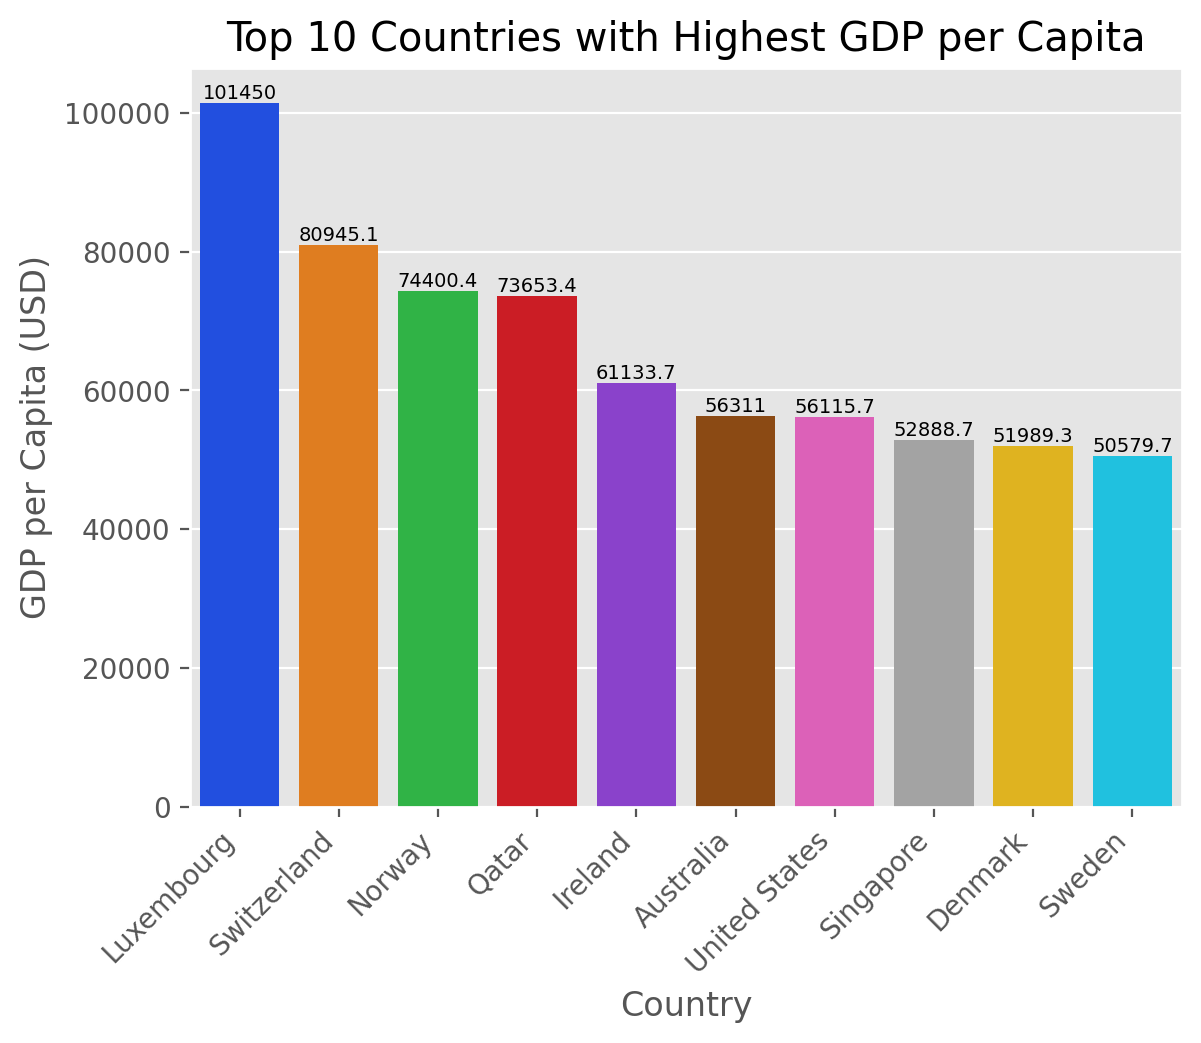

In [31]:
# Barplot of top 10 countries with highest GDP
ax = barplot(
    data=top_10_highest_GDP_countries,
    x="Country",
    y="GDP per Capita",
    palette="bright",
    hue="Country",
);

ax.set_title("Top 10 Countries with Highest GDP per Capita");
ax.set_xlabel("Country");
ax.set_ylabel("GDP per Capita (USD)");
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

### 5.2. Top 10 Countries with the highest Population

<!-- ![Top 10 Highest Population Countries](https://cdn.statcdn.com/Infographic/images/normal/18671.jpeg) -->
<center>
    <img alt="Top 10 Highest Population Countries" src="https://cdn.statcdn.com/Infographic/images/normal/18671.jpeg" width=300>
    <p>Top 10 Highest Population Countries</p>
</center>

In [32]:
top_10_pop = dictionary_df_copy.sort_values(
    "Population", ascending=False
).reset_index(drop=True).head(10)

display(top_10_pop[["Country", "Code", "Population"]])

,Country,Code,Population
0,China,CHN,1.371220e+09
1,India,IND,1.311051e+09
2,United States,USA,3.214188e+08
3,Indonesia,INA,2.575638e+08
4,Brazil,BRA,2.078475e+08
5,Pakistan,PAK,1.889249e+08
6,Nigeria,NGR,1.822020e+08
7,Bangladesh,BAN,1.609956e+08
8,Russia,RUS,1.440968e+08
9,Mexico,MEX,1.270172e+08


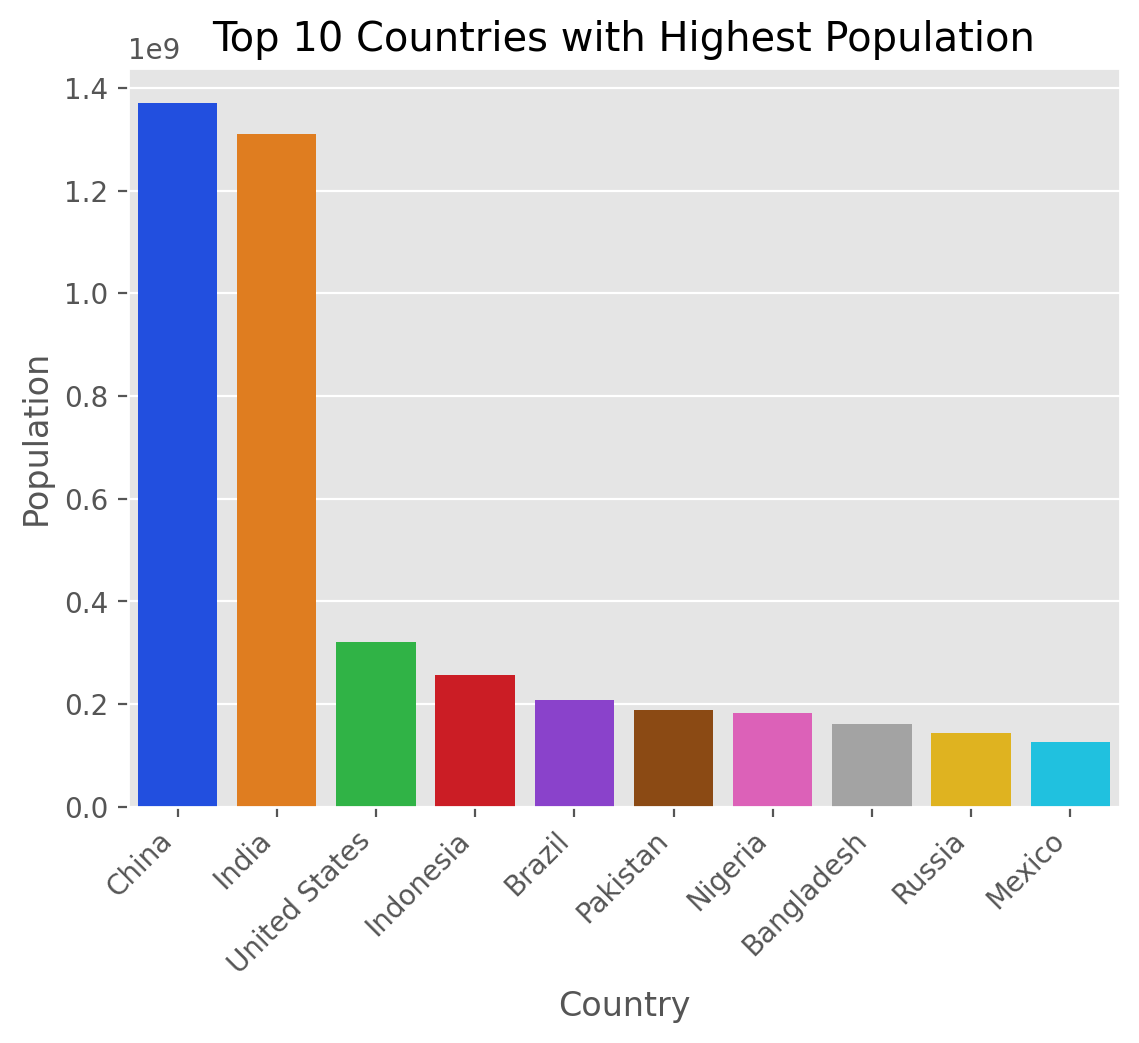

In [33]:
# Barplot of top 10 countries with highest population
ax = sns.barplot(
    data=top_10_pop,
    x="Country",
    y="Population",
    palette="bright",
    hue="Country",
)

ax.set_title("Top 10 Countries with Highest Population");
ax.set_xlabel("Country");
ax.set_ylabel("Population");
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

Yes, they do. ***GDP***, ***population***, and ***politics*** matter in determining a country's success in the Olympics.

* **GDP**: Wealthier nations tend to perform better due to more resources for sports infrastructure, training, and athlete support.
* **Population**: Larger populations provide a bigger talent pool, increasing the likelihood of producing top athletes.
* **Politics**: Government investment in sports and political stability play a key role in nurturing athletes and ensuring consistent Olympic participation.


## 6. Statistical Analysis and Hypothesis Testing with scipy.

### 6.1. Preparation of Data

In [34]:
dictionary_df_copy.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [35]:
summer_winter_df.sample(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
16002,1980,Moscow,Handball,Handball,"DOERING, Lothar",GDR,Men,Handball,Gold
7889,1948,London,Rowing,Rowing,"ZIMONYI, Robert",HUN,Men,Pair-Oared Shell With Coxswain (2+),Bronze
16896,1984,Los Angeles,Athletics,Athletics,"LOVIN, Fita",ROU,Women,800M,Bronze
20788,1992,Barcelona,Judo,Judo,"SAKAUE, Yoko",JPN,Women,+ 72KG (Heavyweight),Bronze
3460,1920,Antwerp,Gymnastics,Artistic G.,"TÖNSBERG, Reidar",NOR,Men,"Team, Free System",Silver


In [36]:
# Count medals for each country
medal_counts = summer_winter_df.groupby('Country')['Medal'].count().reset_index()
medal_counts.rename(columns={'Medal': 'Medal_Count'}, inplace=True)
print("groupby Country with Medal_Count column:")
display(medal_counts[medal_counts['Country'] == 'USA'])

# Map Medal_Count to dictionary_df_copy using the 'Code' column
dictionary_df_copy['Medal_Count'] = dictionary_df_copy['Code'].map(
    medal_counts.set_index('Country')['Medal_Count']
)

# Fill NaN values with 0 for countries with no medals
dictionary_df_copy['Medal_Count'] = dictionary_df_copy['Medal_Count'].fillna(0).astype(int)
print("dictionary_df_copy with Medal_Count column:")
display(dictionary_df_copy[dictionary_df_copy['Code'] == 'USA'])

groupby Country with Medal_Count column:


,Country,Medal_Count
140,USA,5238


dictionary_df_copy with Medal_Count column:


,Country,Code,Population,GDP per Capita,Medal_Count
191,United States,USA,321418820.0,56115.718426,5238


### 6.2. Handle Missing Values

In [37]:
dictionary_df_copy.isnull().sum()

Country            0
Code               0
Population         5
GDP per Capita    25
Medal_Count        0
dtype: int64

In [38]:
# Rename GDP per Capita's column
dictionary_df_copy.rename(columns={"GDP per Capita": "GDP_per_Capita"}, inplace=True)

In [39]:
missing_values_data = dictionary_df_copy.query("Population.isnull() | GDP_per_Capita.isnull()")
missing_values_data

,Country,Code,Population,GDP_per_Capita,Medal_Count
3,American Samoa*,ASA,55538.0,NaN,0
4,Andorra,AND,70473.0,NaN,0
9,Aruba*,ARU,103889.0,NaN,0
20,Bermuda*,BER,65235.0,NaN,1
27,British Virgin Islands,IVB,30117.0,NaN,0
36,Cayman Islands*,CAY,59967.0,NaN,0
45,Cook Islands,COK,NaN,NaN,0
49,Cuba,CUB,11389562.0,NaN,410
61,Eritrea,ERI,NaN,NaN,1
74,Guam,GUM,169885.0,NaN,0


In [40]:
# Add data to missing value
dictionary_df_copy.loc[45, 'Population'] = 13729
dictionary_df_copy.loc[61, 'Population'] =  3535603
dictionary_df_copy.loc[130, 'Population'] =  225369
dictionary_df_copy.loc[139, 'Population'] =  5495443
dictionary_df_copy.loc[177, 'Population'] =  23213962

dictionary_df_copy.loc[3, 'GDP_per_Capita'] =  13101.54
dictionary_df_copy.loc[4, 'GDP_per_Capita'] =  38885.53
dictionary_df_copy.loc[9, 'GDP_per_Capita'] =  28419.26
dictionary_df_copy.loc[20, 'GDP_per_Capita'] =  102005.63
dictionary_df_copy.loc[27, 'GDP_per_Capita'] =  43647.0
dictionary_df_copy.loc[36, 'GDP_per_Capita'] =  77295.85
dictionary_df_copy.loc[45, 'GDP_per_Capita'] =  17077.0
dictionary_df_copy.loc[49, 'GDP_per_Capita'] =  7683.74
dictionary_df_copy.loc[61, 'GDP_per_Capita'] =  603.19
dictionary_df_copy.loc[74, 'GDP_per_Capita'] =  34522.38
dictionary_df_copy.loc[86, 'GDP_per_Capita'] =  4990.94
dictionary_df_copy.loc[96, 'GDP_per_Capita'] =  649.9
dictionary_df_copy.loc[105, 'GDP_per_Capita'] =  7867.51
dictionary_df_copy.loc[106, 'GDP_per_Capita'] =  167809.27
dictionary_df_copy.loc[116, 'GDP_per_Capita'] =  1562.73
dictionary_df_copy.loc[121, 'GDP_per_Capita'] =  170338.68
dictionary_df_copy.loc[130, 'GDP_per_Capita'] =  26300.0
dictionary_df_copy.loc[139, 'GDP_per_Capita'] =  433.0
dictionary_df_copy.loc[141, 'GDP_per_Capita'] =  2502.07
dictionary_df_copy.loc[147, 'GDP_per_Capita'] =  29763.49
dictionary_df_copy.loc[156, 'GDP_per_Capita'] =  42281.81
dictionary_df_copy.loc[176, 'GDP_per_Capita'] =  857.42
dictionary_df_copy.loc[177, 'GDP_per_Capita'] =  22753.0
dictionary_df_copy.loc[195, 'GDP_per_Capita'] =  4096.97
dictionary_df_copy.loc[197, 'GDP_per_Capita'] =  34007.35

In [41]:
# Display row with Code COK, ERI, AHO, PLE and TPE
display(dictionary_df_copy[
    (dictionary_df_copy["Code"] == "COK") |
    (dictionary_df_copy["Code"] == "ERI") |
    (dictionary_df_copy["Code"] == "AHO") |
    (dictionary_df_copy["Code"] == "PLE") |
    (dictionary_df_copy["Code"] == "TPE")
])

,Country,Code,Population,GDP_per_Capita,Medal_Count
45,Cook Islands,COK,13729.0,17077.00,0
61,Eritrea,ERI,3535603.0,603.19,1
130,Netherlands Antilles*,AHO,225369.0,26300.00,1
139,"Palestine, Occupied Territories",PLE,5495443.0,433.00,0
177,Taiwan,TPE,23213962.0,22753.00,44


In [42]:
dictionary_df_copy.isnull().sum()

Country           0
Code              0
Population        0
GDP_per_Capita    0
Medal_Count       0
dtype: int64

### 6.3. Perform Hypothesis Testing

#### Chi-Square test
1. Null Hypothesis $H_0$:

    There is **no significant difference** in the distribution of medal counts between high GDP and low GDP countries.  
    - In other words, the number of medals won is **independent of GDP group** (high or low).

2.  Alternative Hypothesis $H_a$:

    There is a **significant difference** in the distribution of medal counts between high GDP and low GDP countries.  
    - In other words, the number of medals won is **dependent on GDP group** (high or low). 

3. Interpretation in Context:
    - If the **p-value** from the chi-square test is **less than 0.05**, we reject $H_0$ and accept $H_a$, concluding that GDP group significantly affects medal counts.
    - If the **p-value** is **greater than or equal to 0.05**, we fail to reject $H_0$, meaning there is not enough evidence to suggest a relationship between GDP group and medal counts.

In [43]:
from scipy.stats import chi2_contingency

# Create a GDP_Group column
median_gdp = dictionary_df_copy['GDP_per_Capita'].median()
dictionary_df_copy['GDP_Group'] = ['High' if gdp > median_gdp else 'Low' for gdp in dictionary_df_copy['GDP_per_Capita']]

# Create a contingency table
contingency_table = pd.crosstab(dictionary_df_copy['GDP_Group'], dictionary_df_copy['Medal_Count'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p:.10f}")
print(f"Degrees of Freedom: {dof}")
# print("Expected Frequencies:")
# print(expected)

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis: The distribution of medals is significantly different between high GDP and low GDP countries.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence of a difference in the distribution of medals between high GDP and low GDP countries.")


Chi-Square Statistic: 82.24
P-Value: 0.3204939418
Degrees of Freedom: 77
Fail to reject the null hypothesis: There is no significant evidence of a difference in the distribution of medals between high GDP and low GDP countries.


#### t-test
1. **Null Hypothesis $H_0$**:

    There is **no significant difference** in the average medal counts between high GDP and low GDP countries.  
    - In other words, the average number of medals won is **equal** for both high GDP and low GDP countries.
    $$H_0: \mu_{\text{High GDP}} = \mu_{\text{Low GDP}}$$

2. **Alternative Hypothesis $H_a$**:

    There is a **significant difference** in the average medal counts between high GDP and low GDP countries.  
    - In other words, the average number of medals won is **not equal** for high GDP and low GDP countries.
    $$H_0: \mu_{\text{High GDP}} \neq \mu_{\text{Low GDP}}$$

3. **Interpretation in Context**:
    - If the **p-value** from the t-test is **less than 0.05**, we reject $H_0$ and accept $H_a$, concluding that GDP group significantly affects the average number of medals won.
    - If the **p-value** is **greater than or equal to 0.05**, we fail to reject $H_0$, meaning there is not enough evidence to suggest a difference in the average number of medals won between high GDP and low GDP countries.

In [44]:
from scipy.stats import ttest_ind

# Separate Medal_Count data into two groups based on GDP_Group
high_gdp_medals = dictionary_df_copy[dictionary_df_copy['GDP_Group'] == 'High']['Medal_Count']
low_gdp_medals = dictionary_df_copy[dictionary_df_copy['GDP_Group'] == 'Low']['Medal_Count']

# Perform the t-test
t_statistic, p_value = ttest_ind(high_gdp_medals, low_gdp_medals, equal_var=False)

print(f"T-Test Statistic: {t_statistic:.2f}")
print(f"P-Value: {p_value:.10f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: High GDP countries win significantly more medals on average.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average medal count between high GDP and low GDP countries.")


T-Test Statistic: 4.10
P-Value: 0.0000856762
Reject the null hypothesis: High GDP countries win significantly more medals on average.


## 7. Aggregating and Ranking.

### 7.1. Aggregate Medals by Country

In [45]:
medal_counts.head(10)

,Country,Medal_Count
0,AFG,2
1,AHO,1
2,ALG,15
3,ANZ,29
4,ARG,259
5,ARM,11
6,AUS,1204
7,AUT,426
8,AZE,26
9,BAH,27


### 7.2. Ranking

In [46]:
medal_counts['Rank'] = medal_counts['Medal_Count'].rank(ascending=False).astype(int)
medal_counts = medal_counts.sort_values("Rank", ascending=True)
medal_counts.head(10)

,Country,Medal_Count,Rank
140,USA,5238,1
138,URS,2489,2
47,GBR,1799,3
50,GER,1665,4
44,FRA,1548,5
68,ITA,1488,6
122,SWE,1477,7
21,CAN,1275,8
6,AUS,1204,9
58,HUN,1091,10


### 7.3. Aggregate Country, Sport and Medals on each type of Sports

In [47]:
sport_medal = summer_winter_df.groupby(['Country', 'Sport']).agg(
    {'Medal': 'count'}
).reset_index()

top_10 = [x for x in most_successful_countries['Country'].head(10)]
top_10_sport_medal = sport_medal[sport_medal['Country'].isin(top_10)]

print("USA Medals on each sport:")
display(top_10_sport_medal[top_10_sport_medal['Country'] == 'USA'])
print("\nAUS Medals on each sport:")
display(top_10_sport_medal[top_10_sport_medal['Country'] == 'AUS'])

USA Medals on each sport:


,Country,Sport,Medal
1145,USA,Aquatics,1184
1146,USA,Archery,55
1147,USA,Athletics,994
1148,USA,Baseball,68
1149,USA,Basketball,318
1150,USA,Bobsleigh,93
1151,USA,Boxing,111
1152,USA,Canoe / Kayak,21
1153,USA,Curling,5
1154,USA,Cycling,66



AUS Medals on each sport:


,Country,Sport,Medal
31,AUS,Aquatics,400
32,AUS,Archery,2
33,AUS,Athletics,84
34,AUS,Baseball,24
35,AUS,Basketball,60
36,AUS,Boxing,4
37,AUS,Canoe,5
38,AUS,Canoe / Kayak,33
39,AUS,Cycling,76
40,AUS,Equestrian,31


In [48]:
top_5_sport_medal = sport_medal[sport_medal['Country'].isin(top_10[:5])]
top_5_sport_medal

,Country,Sport,Medal
406,FRA,Aquatics,110
407,FRA,Archery,46
408,FRA,Athletics,106
409,FRA,Basketball,38
410,FRA,Basque Pelota,2
...,...,...,...
1178,USA,Triathlon,1
1179,USA,Tug of War,15
1180,USA,Volleyball,114
1181,USA,Weightlifting,43


In [49]:
fig = px.bar(
    top_10_sport_medal, # change `top_10_sport_medal` to `top_5_sport_medal` to show top 5 countries
    x='Sport',
    y='Medal',
    color='Country',
    title='Top 10 Countries by Sport and Medal Count',
    labels={'Medal': 'Number of Medals', 'Sport': 'Sport', 'Country': 'Country'},
    barmode='stack',
    height=600
)

fig.show()

## 8. Summer Games Vs. Winter Games (Does Geographical Location Matter?)

In [50]:
# Aggregate medal counts for Summer and Winter Games
summer_medal_counts = summer_df.groupby('Country')['Medal'].count().reset_index()
summer_medal_counts.rename(columns={'Medal': 'Summer_Medals'}, inplace=True)

winter_medal_counts = winter_df.groupby('Country')['Medal'].count().reset_index()
winter_medal_counts.rename(columns={'Medal': 'Winter_Medals'}, inplace=True)

# Merge the two dataframes on the 'Country' column
summer_winter_medal_counts = pd.merge(summer_medal_counts, winter_medal_counts, on='Country', how='outer').fillna(0)
summer_winter_medal_counts['Total_Medals'] = summer_winter_medal_counts['Summer_Medals'] + summer_winter_medal_counts['Winter_Medals']

# Display the top 10 countries with the most medals in both Summer and Winter Games
top_10_countries_summer_winter = summer_winter_medal_counts.sort_values('Total_Medals', ascending=False).head(10)
display(top_10_countries_summer_winter)

# Plot the comparison using plotly
fig = px.bar(
    top_10_countries_summer_winter,
    x='Country',
    y=['Summer_Medals', 'Winter_Medals'],
    title='Top 10 Countries by Medal Count in Summer and Winter Games',
    labels={'value': 'Number of Medals', 'variable': 'Games'},
    barmode='stack',
    height=600,
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.show()
fig = px.area(
    top_10_countries_summer_winter,
    x='Country',
    y=['Summer_Medals', 'Winter_Medals'],
    title='Top 10 Countries by Medal Count in Summer and Winter Games',
    labels={'value': 'Number of Medals', 'variable': 'Games'},
    height=600
)

fig.show()

,Country,Summer_Medals,Winter_Medals,Total_Medals
139,USA,4585.0,653.0,5238.0
137,URS,2049.0,440.0,2489.0
47,GBR,1720.0,79.0,1799.0
50,GER,1305.0,360.0,1665.0
44,FRA,1396.0,152.0,1548.0
68,ITA,1296.0,192.0,1488.0
121,SWE,1044.0,433.0,1477.0
21,CAN,649.0,625.0,1274.0
6,AUS,1189.0,15.0,1204.0
58,HUN,1079.0,12.0,1091.0


Why More Medals Are Won in the Summer Olympics Compared to the Winter Olympics? 
* **More Events**: The Summer Olympics feature a greater number of sports and events (~339 vs. ~109 in Winter), resulting in more medal opportunities.
* **Higher Global Participation**: Summer sports are more universally accessible, with participation from a broader range of countries compared to the Winter Olympics, which are dominated by nations with cold climates.
* **Larger Athlete Pool**: The Summer Olympics attract significantly more athletes (~11,000 vs. ~2,900 in Winter), increasing the number of competitions and medal chances.


## 9. Men Vs. Women - Does Culture & Religion Matter?

In [51]:
# Group by Country, Gender, and Medal, then count each type of medal separately
gender_medal_counts = (
    summer_winter_df.groupby(["Country", "Gender", "Medal"])
    .size()
    .unstack(fill_value=0)  # Create separate columns for each medal type
    .reset_index()
)

# Calculate total medals for each gender in each country
gender_medal_counts["Total_Medals"] = gender_medal_counts.sum(axis=1, numeric_only=True)

# Separate data for men and women
men_medal_counts = gender_medal_counts[gender_medal_counts["Gender"] == "Men"]
women_medal_counts = gender_medal_counts[gender_medal_counts["Gender"] == "Women"]

# Merge the two dataframes on the 'Country' column
men_vs_women_medal_counts = pd.merge(
    men_medal_counts[["Country", "Total_Medals"]],
    women_medal_counts[["Country", "Total_Medals"]],
    on="Country",
    suffixes=("_Men", "_Women")
).fillna(0)

# Display the top 10 countries with the most medals for men and women
top_10_countries_men_vs_women = men_vs_women_medal_counts.sort_values(
    ["Total_Medals_Men", "Total_Medals_Women"], ascending=False
).head(10)
display(top_10_countries_men_vs_women)

Medal,Country,Total_Medals_Men,Total_Medals_Women
84,USA,3618,1620
83,URS,1807,682
30,GBR,1470,329
28,FRA,1351,197
43,ITA,1292,196
74,SWE,1280,197
33,GER,1119,546
36,HUN,840,251
12,CAN,814,461
58,NOR,791,220


In [52]:
# Plot the comparison using plotly
fig = px.bar(
    top_10_countries_men_vs_women,
    x="Country",
    y=["Total_Medals_Men", "Total_Medals_Women"],
    title="Top 10 Countries by Medal Count for Men and Women",
    labels={"value": "Number of Medals", "variable": "Gender"},
    barmode="group",
    height=600,
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.show()

In [53]:
# Data for the pie chart
labels = top_10_successful_countries['Country']
values = top_10_successful_countries['Total_Medals']

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

# Update the layout for better visualization
fig.update_layout(
    title_text="Distribution of Total Medals Among Top 10 Successful Countries",
    annotations=[dict(text='Medals', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the pie chart
fig.show()

## 10. Do Traditions Matter?

In [59]:
dictionary_df.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [60]:
summer_winter_df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [75]:
# Example of traditional sports mapping
traditional_sports = {
    "USA": ["Athletics", "Swimming"],
    "KEN": ["Athletics"],
    "NOR": ["Skiing", "Biathlon"],
    "RUS": ["Gymnastics", "Figure Skating"],
    # Add more countries and sports as needed
}

# Add a column indicating whether the sport is traditional for the country
summer_winter_df["traditional"] = summer_winter_df.apply(
    lambda x: "Traditional" if x["Sport"] in traditional_sports.get(x["Country"], []) else "Non-Traditional",
    axis=1,
)

# Count medals by traditional vs. non-traditional
tradition_stats = summer_winter_df.groupby("traditional")["Medal"].count()
print("Medal counts by traditional vs. non-traditional sports:\n", tradition_stats)

# Perform a chi-square test
tradition_table = pd.crosstab(summer_winter_df["traditional"], summer_winter_df["Medal"])
chi2, p, dof, expected = chi2_contingency(tradition_table)

print("Chi-square statistic:", chi2)
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("Result: A significant relationship exists between traditional sports and medal counts.")
else:
    print("Result: No significant relationship between traditional sports and medal counts.")


Medal counts by traditional vs. non-traditional sports:
 traditional
Non-Traditional    35385
Traditional         1548
Name: Medal, dtype: int64
Chi-square statistic: 105.91865583914426
P-value: 1.0001292276400937e-23
Result: A significant relationship exists between traditional sports and medal counts.
